<a href="https://colab.research.google.com/github/wagner-alves-AI/datascience/blob/master/Regress%C3%A3o_Linear_Predicao_da_Idade_dos_Passageiros_do_Titanic_Estudado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear - Predição da Idade

### importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [ ]:
train = pd.read_csv('titanic/train.csv')

In [ ]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [ ]:
train.set_index('PassengerId', inplace=True)

In [ ]:
train

In [ ]:
test.set_index('PassengerId', inplace=True)

In [ ]:
test

### Verificar shape dos dois

In [ ]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [ ]:
test['Survived'] = np.nan

### Conferir shape novamente

In [ ]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [ ]:
data = pd.concat([train, test], sort=False)

In [ ]:
data.shape

(1309, 11)

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Traduzir colunas

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaoConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

In [ ]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Traduzir Sexo

In [ ]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female': 'mulher'})

In [ ]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


### Averiguar dados nulos

In [ ]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            1
Embarque          2
dtype: int64

### Remover Cabine

In [ ]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [ ]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            1
Embarque          2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [ ]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [ ]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [ ]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            1
Embarque          0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [ ]:
media = data['Tarifa'].mean()
media

33.2954792813456

In [ ]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [ ]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Embarque          0
dtype: int64

### Verificar correlações

In [ ]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaoConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaoConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

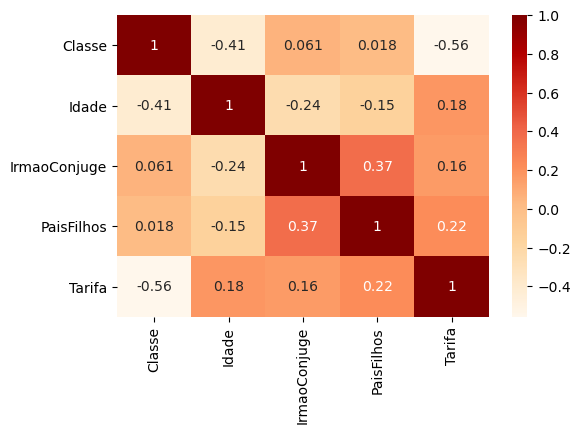

In [ ]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')
plt.show()

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [ ]:
data.drop('Sobreviveu', axis=1, inplace=True)

### Checar dados nulos

In [ ]:
data.isnull().sum()

Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Embarque          0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [ ]:
data['Título'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [ ]:
data['Título'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [ ]:
['Miss','Master','Mr','Mrs']

Index(['Classe', 'Nome', 'Sexo', 'Idade', 'IrmaoConjuge', 'PaisFilhos',
       'Bilhete', 'Tarifa', 'Embarque', 'Titulo'],
      dtype='object')

In [ ]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

### Traduzir "Titulos"

In [ ]:
titulos_traduzidos = {
    'Master':'Menino',
    'Miss' : 'Solteira',
    'Mr' : 'HomemAdulto',
    'Mrs': 'Casada'
}

In [ ]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Classe        1309 non-null   int64  
 1   Nome          1309 non-null   object 
 2   Sexo          1309 non-null   object 
 3   Idade         1046 non-null   float64
 4   IrmaoConjuge  1309 non-null   int64  
 5   PaisFilhos    1309 non-null   int64  
 6   Bilhete       1309 non-null   object 
 7   Tarifa        1309 non-null   float64
 8   Embarque      1309 non-null   object 
 9   Titulo        1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [ ]:
data.drop(['Bilhete','Nome'], axis=1, inplace=True)

In [ ]:
data.head()

,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [ ]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais

,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [ ]:
solteira_com_pais['Idade'].mean()

12.178815789473683

### verificar distribuição da idade

C:\Users\cs328564\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\cs328564\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


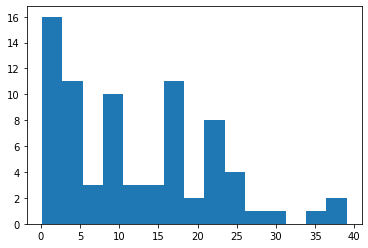

In [ ]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

### Média de mulheres "solteiras"

In [ ]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

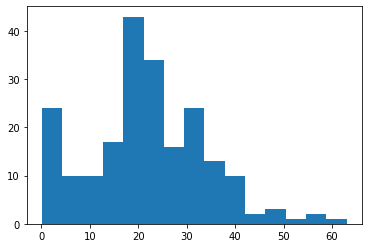

In [ ]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [ ]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

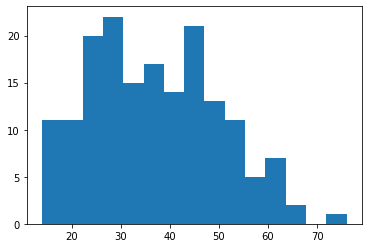

In [ ]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"

In [ ]:
solteira_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [ ]:
data['solteira_com_pais'] = 0

In [ ]:
data['solteira_com_pais']

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: solteira_com_pais, Length: 1309, dtype: int64

In [ ]:
for idx, _ in data.iterrows():
    if idx in solteira_com_pais.index:
        data['solteira_com_pais'].at[idx] = 1

In [ ]:
data['solteira_com_pais'].head(30)

PassengerId
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
Name: solteira_com_pais, dtype: int64

In [ ]:
data.loc[data['solteira_com_pais']==1]['Idade'].mean()

12.178815789473683

In [ ]:
data.loc[data['solteira_com_pais']==0]['Idade'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"

In [ ]:
data.head()

,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [ ]:
data['Sexo'] = data['Sexo'].map({'homem':0, 'mulher':1})

In [ ]:
data = pd.get_dummies(data, columns=['Classe','Embarque','Titulo'], drop_first=True)

In [ ]:
data.head()

,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0


In [ ]:
data.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [ ]:
data.isnull().sum() 

Sexo                    0
Idade                 263
IrmaoConjuge            0
PaisFilhos              0
Tarifa                  0
solteira_com_pais       0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [ ]:
train_idade = data.dropna()

In [ ]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [ ]:
test_idade

,Sexo,IrmaoConjuge,PaisFilhos,Tarifa,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
6,0,0,0,8.4583,0,0,1,1,0,1,0,0
18,0,0,0,13.0000,0,1,0,0,1,1,0,0
20,1,0,0,7.2250,0,0,1,0,0,0,0,0
27,0,0,0,7.2250,0,0,1,0,0,1,0,0
29,1,0,0,7.8792,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,0,1,1,0,0,0,1
1302,1,0,0,7.7500,0,0,1,1,0,0,0,1
1305,0,0,0,8.0500,0,0,1,0,1,1,0,0


In [ ]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [ ]:
X = train_idade.drop('Idade', axis=1)

In [ ]:
y = train_idade['Idade']

In [ ]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [ ]:
from sklearn import linear_model

### Instanciar modelo

In [ ]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [ ]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [ ]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [ ]:
X_test.shape, y_test.shape

((314, 12), (314,))

In [ ]:
lm.fit(X_train, y_train) # treino do modelo

LinearRegression()

### Fazer predição

In [ ]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [ ]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [ ]:
lm.score(X_test, y_test)

0.4805876982432238

### Averiguar rmse

In [ ]:
mse = mean_squared_error(y_test, pred)

In [ ]:
rmse = np.sqrt(mse)
rmse

10.363417349081386

### Visualizar resíduos em scatterplot

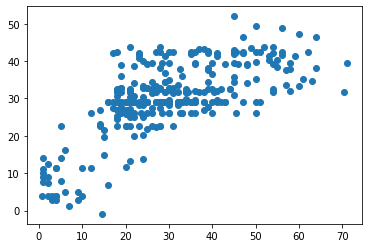

In [ ]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [ ]:
test_idade.shape

(263, 12)

In [ ]:
pred_idade = lm.predict(test_idade)

In [ ]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [ ]:
test_idade['Idade'] = pred_idade

In [ ]:
test_idade.isnull().sum()

Sexo                  0
IrmaoConjuge          0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [ ]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [ ]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [ ]:
idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaoConjuge          0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [ ]:
idade.shape

(1309, 13)

In [ ]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade':idade['Idade']})

In [ ]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.163780
1302,1302,25.163531
1305,1305,29.088798


### Salvar CSV com idade completa

In [ ]:
idade_completa.to_csv('idade_completa.csv', index=False)

In [ ]:
data_idade = pd.read_csv('idade_completa.csv')

In [ ]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.163780
1305,1302,25.163531
1306,1305,29.088798
1307,1308,29.088798
